# 1. Import Libraries and Create Dictionary from State List

In [256]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as s

state_list = [
    'Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware',
    'Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky',
    'Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana',
    'Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio',
    'Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas',
    'Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']

student_list = [737294,134358,922180,449805,6248610,742145,570228,115555,
               2500478,1470634,184546,246521,2071391,996133,485932,470205,
               654363,731328,205586,860640,973140,1730668,851384,493507,
               909792,151947,285095,356814,206847,1341656,320260,2872132,
               1315363,106047,1830985,622139,551480,1821627,158046,691078,
               127542,925030,4163447,484677,101179,1163091,1009200,282885,
               879361,88128]

teacher_list = [46796,8026,46015,33079,304296,44182,41773,7571,134684,92732,
               11007,13854,129600,59658,34906,33084,40375,49980,16741,53774,
               68942,98849,53081,31213,65240,10408,21083,19276,14677,103611,
               21823,209128,85684,8035,122115,41632,28402,118470,11103,46616,
               9370,58357,282846,22211,8554,89314,52534,20139,60918,7026]

dict1 = {}
counter = 0 
for state in state_list:
    dict1[state] = {'Students': student_list[counter],'Teachers': teacher_list[counter]}
    counter +=1



# 2. Create a Function to Run Multiple Trials of n =5

In [260]:
def random_samples(num_trials, size=5):
    sample_mean_list = []
    rng = np.random.default_rng()
    
    for x in range(0,num_trials):
        rand_samp = rng.choice(50,size, replace=False)

        tea_samp_list = []
        
        for n in rand_samp:
            n = state_list[n]
            tea_samp_list.append(dict1[n].get('Teachers'))
        
        sample_mean = sum(tea_samp_list) / size
        
        sample_mean_list.append(sample_mean)
    
    return sample_mean_list

# 3. Run the Function for n=5 with Differing Trial Sizes

#### Plotting the Distribution as well as the sample mean and Standard Deviation of Means (i.e. Standard Error)

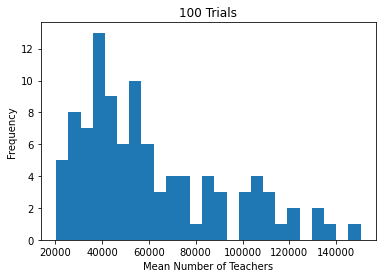

The mean is: 60950.028

The Standard Deviation is: 30886.92174948491



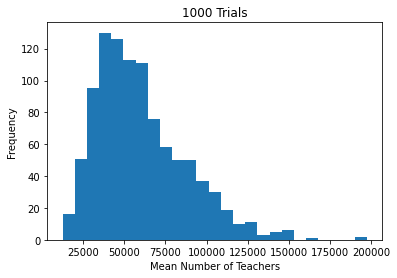

The mean is: 60249.5906

The Standard Deviation is: 27490.41860081872



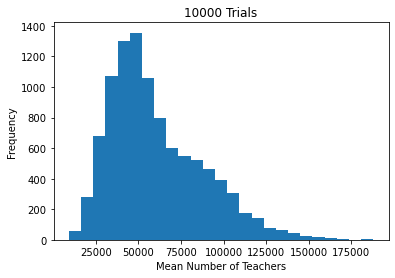

The mean is: 60305.14722

The Standard Deviation is: 27293.39172346279



In [261]:
trial_list = [100,1_000,10_000]

for n in trial_list:
    x = random_samples(n)
    n_bins= 25
    plt.hist(x,n_bins)

    plt.xlabel('Mean Number of Teachers')
    plt.ylabel('Frequency')
    plt.title(f'{n} Trials')
    plt.show()

    print(f'The mean is: {s.mean(x)}\n')
    print(f'The Standard Deviation is: {s.stdev(x)}\n')


# 4. Trying out Different Methods to Normalize the Data

##### Firstly by Adjusting the sample size n, or also we could log transform the data

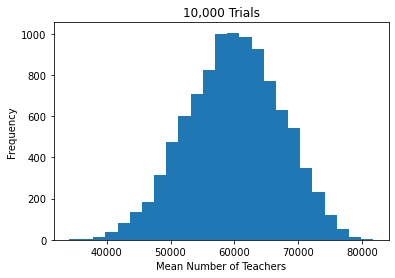

The mean is: 59916.25063

The Standard Deviation is: 7283.831534536717



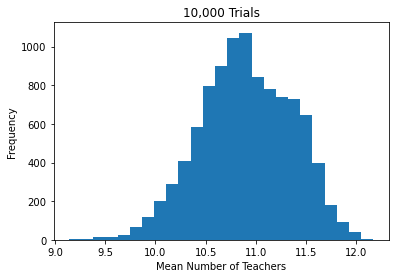

The mean is: 10.903745988528202

The Standard Deviation is: 0.4583455681220577



In [266]:
# Using a Sample size of 30 instead of 5
x = random_samples(10_000,30)
n_bins= 25

plt.hist(x,n_bins)

plt.xlabel('Mean Number of Teachers')
plt.ylabel('Frequency')
plt.title('10,000 Trials')
plt.show()

print(f'The mean is: {s.mean(x)}\n')
print(f'The Standard Deviation is: {s.stdev(x)}\n')


# Log Transforming the Data 
x = random_samples(10_000)
n_bins= 25

plt.hist(np.log(x),n_bins)

plt.xlabel('Mean Number of Teachers')
plt.ylabel('Frequency')
plt.title('10,000 Trials')
plt.show()

print(f'The mean is: {s.mean(np.log(x))}\n')
print(f'The Standard Deviation is: {s.stdev(np.log(x))}\n')

# 5. Comparing Theoretical Standard Error vs. Calculated Error From Sample

In [278]:
def compare_error(n):
    theoretical_error = s.stdev(teacher_list) / math.sqrt(n)
    x = random_samples(10_000,n)
    print(f'Using a sample size of {n}:')
    print(f'The Theoretical Standard Error is: {theoretical_error}')
    print(f'The Sample Standard Error is: {s.stdev(x)}\n')

In [279]:
compare_error(5)
compare_error(10)
compare_error(25)
compare_error(50)

Using a sample size of 5:
The Theoretical Standard Error is: 28465.01851216611
The Sample Standard Error is: 26986.965473878845

Using a sample size of 10:
The Theoretical Standard Error is: 20127.807616553266
The Sample Standard Error is: 18002.275759088792

Using a sample size of 25:
The Theoretical Standard Error is: 12729.943274798668
The Sample Standard Error is: 8931.861623790113

Using a sample size of 50:
The Theoretical Standard Error is: 9001.429213730224
The Sample Standard Error is: 0.0



# 6. Using Finite Population Correction to Adjust Theoretical Standard Error 

##### Larger Sample sizes result in larger deviations from the theoretical value due to the fact that the samples are a larger proportion of the population. 

##### A Finite Population Correction is Required in order to adjust the theoretical value to match the sample value

In [283]:
def adjusted_error(n):
    theoretical_error = s.stdev(teacher_list) / math.sqrt(n)
    x = random_samples(10_000,n)
    fpc = math.sqrt((len(teacher_list)-n) / (len(teacher_list) -1))
    
    print(f'Using a sample size of {n}:')
    print(f'The Theoretical Standard Error is: {theoretical_error}')
    print(f'The Sample Standard Error is: {s.stdev(x)}')
    print(f'The Adjusted Theoretical Error is {theoretical_error * fpc}\n')

In [284]:
adjusted_error(5)
adjusted_error(10)
adjusted_error(25)
adjusted_error(50)


Using a sample size of 5:
The Theoretical Standard Error is: 28465.01851216611
The Sample Standard Error is: 27019.573283434223
The Adjusted Theoretical Error is 27278.449874568578

Using a sample size of 10:
The Theoretical Standard Error is: 20127.807616553266
The Sample Standard Error is: 17712.817495798285
The Adjusted Theoretical Error is 18185.633249712384

Using a sample size of 25:
The Theoretical Standard Error is: 12729.943274798668
The Sample Standard Error is: 9051.728985924241
The Adjusted Theoretical Error is 9092.816624856192

Using a sample size of 50:
The Theoretical Standard Error is: 9001.429213730224
The Sample Standard Error is: 0.0
The Adjusted Theoretical Error is 0.0

